In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

### Ejemplo F27 Pass Matrix
En este caso Ceballos que fue suplente y completó 27 pases (**pass_success**) con 0 pases incorrectos (**pass_lost**) y su posición media en función de los contactos con pelota es **x =58,26  y=46,09** .Al tener x>50 se trata de campo contrario
*  2 pases correctos a Sergio Ramos
*  9 pases correctos a Toni Kroos
*  1 pase correcto a Carvajal
*  3 pases correctos a Isco
*  2 pases correctos a Bale
*  5 pases correctos a Casemiro
*  1 pase correcto a  Lucas Vázquez
*  1 pase correctos a Benzema
*  3 pases correctos a  Marcelo

![Campo](imagenes/Opta_F27.png)

### Seleccionar aquí el fichero Pass Matrix F27 de Opta 

In [2]:
## Poner aqui la ruta a nuestro archivo
file = ET.parse(r"pass_matrix_23_2017_g942842_t188.xml") 

In [3]:
namelist= []
xlist =[]
ylist = []
pointslist = []
passer = []
receiver = []
passeslist = []
links = []
poslist = []
pass_success_list = []

for node in file.getroot():
    name = node.attrib.get("player_name")
    x = node.attrib.get("x")
    y = node.attrib.get("y")
    pos = node.attrib.get("position")
    pass_success = node.attrib.get("pass_success")
    namelist.append(name)
    xlist.append(x)
    ylist.append(y)
    poslist.append(pos)
    pass_success_list.append(pass_success)

    for players in node:
            passes = players.text
            name = players.attrib.get("player_name")
            passer.append(node.attrib.get("player_name"))
            receiver.append(name)
            passeslist.append(passes)
                   
 

In [4]:
xlist = [float(i) for i in xlist]

In [5]:
ylist = [float(i) for i in ylist]

In [6]:
for i,j in zip(xlist,ylist):
    point = [i,j]
    pointslist.append(point)
    

In [7]:
pass_success_list = [int(i) for i in pass_success_list]

In [8]:
player_dict = dict(zip(namelist, pointslist))

In [9]:
player_dict

{'Sergio Canales': [54.18, 58.62],
 'Jon Bautista': [73.17, 42.88],
 'Carlos Vela': [66.97, 35.27],
 'Asier Illarramendi': [50.05, 63.36],
 'Xabi Prieto': [65.49, 26.39],
 'Andoni Gorosabel': [50.09, 14.05],
 'Aritz Elustondo': [39.68, 31.34],
 'Diego Llorente': [40.96, 63.38],
 'Juanmi': [54.87, 68.01],
 'Alberto de la Bella': [48.36, 86.34],
 'Willian José': [49.36, 53.8],
 'Álvaro Odriozola': [60.34, 13.07],
 'Igor Zubeldia': [46.53, 39.96],
 'Gerónimo Rulli': [9.19, 52.62]}

 ## P_df  Jugadores y posición media basada en los contactos con el balón
 ### Players Dataframe
 
 Colummns
   * Name PlayerName
   * x Average X position
   * y Average Y position
   * PassSuccess (Total Successful Passes)
 

In [10]:
P_Df = pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist,pass_success_list)), 
                    columns = ["Name","x","y","Position","PassSuccess"])

#### Vemos los tipos de los datos

In [11]:
P_Df.dtypes

Name            object
x              float64
y              float64
Position        object
PassSuccess      int64
dtype: object

In [12]:
P_Df

,Name,x,y,Position,PassSuccess
0,Sergio Canales,54.18,58.62,Substitute,14
1,Jon Bautista,73.17,42.88,Substitute,7
2,Carlos Vela,66.97,35.27,Midfielder,31
3,Asier Illarramendi,50.05,63.36,Midfielder,79
4,Xabi Prieto,65.49,26.39,Midfielder,33
5,Andoni Gorosabel,50.09,14.05,Defender,23
6,Aritz Elustondo,39.68,31.34,Defender,56
7,Diego Llorente,40.96,63.38,Defender,71
8,Juanmi,54.87,68.01,Midfielder,14
9,Alberto de la Bella,48.36,86.34,Defender,55


In [13]:
P_Df.sort_values(by=['PassSuccess'],ascending=False).head(20)

,Name,x,y,Position,PassSuccess
3,Asier Illarramendi,50.05,63.36,Midfielder,79
7,Diego Llorente,40.96,63.38,Defender,71
6,Aritz Elustondo,39.68,31.34,Defender,56
9,Alberto de la Bella,48.36,86.34,Defender,55
12,Igor Zubeldia,46.53,39.96,Midfielder,47
4,Xabi Prieto,65.49,26.39,Midfielder,33
2,Carlos Vela,66.97,35.27,Midfielder,31
5,Andoni Gorosabel,50.09,14.05,Defender,23
13,Gerónimo Rulli,9.19,52.62,Goalkeeper,22
0,Sergio Canales,54.18,58.62,Substitute,14


## df --> Passer Receiver Number of Passes

In [14]:
for x,y,z in zip(passer, receiver, passeslist):
    link = [x,y,z]
    links.append(link)
    
df = pd.DataFrame.from_records(data = links, columns = ["Passer","Receiver","Number of Passes"])

In [15]:
df

,Passer,Receiver,Number of Passes
0,Sergio Canales,Carlos Vela,1
1,Sergio Canales,Jon Bautista,1
2,Sergio Canales,Asier Illarramendi,4
3,Sergio Canales,Xabi Prieto,4
4,Sergio Canales,Alberto de la Bella,2
...,...,...,...
112,Gerónimo Rulli,Xabi Prieto,1
113,Gerónimo Rulli,Aritz Elustondo,7
114,Gerónimo Rulli,Diego Llorente,4
115,Gerónimo Rulli,Alberto de la Bella,4


### Ver el tipo de las columnas

In [16]:
df.dtypes

Passer              object
Receiver            object
Number of Passes    object
dtype: object

#### Convertir la columna Number of Passes de cadena de texto a número entero

In [17]:
df['Number of Passes'] = df['Number of Passes'].astype('int64')

In [18]:
df.dtypes

Passer              object
Receiver            object
Number of Passes     int64
dtype: object

### Filtrar combinaciones de pases con 5 o más pases ( mayor que 4)

In [28]:
df= df[df['Number of Passes'] > 7]

In [29]:
df.sort_values(by=['Number of Passes'],ascending=False).head(20)

,Passer,Receiver,Number of Passes
63,Diego Llorente,Asier Illarramendi,28
59,Aritz Elustondo,Diego Llorente,25
31,Asier Illarramendi,Alberto de la Bella,19
77,Alberto de la Bella,Asier Illarramendi,15
30,Asier Illarramendi,Diego Llorente,13
67,Diego Llorente,Alberto de la Bella,13
83,Alberto de la Bella,Diego Llorente,12
66,Diego Llorente,Aritz Elustondo,12
23,Asier Illarramendi,Aritz Elustondo,10
36,Xabi Prieto,Carlos Vela,10


### P_df    --->  tabla con la posición media de los jugadores
* Name nombre del jugador
* x posición media x
* y posición media y
* position (Demarcación Portero, Defensa, Centrocampista y Suplente)
* PassSuccess = Total Passes by player

In [33]:
P_Df.head(15)

,Name,x,y,Position,PassSuccess
0,Sergio Canales,54.18,58.62,Substitute,14
1,Jon Bautista,73.17,42.88,Substitute,7
2,Carlos Vela,66.97,35.27,Midfielder,31
3,Asier Illarramendi,50.05,63.36,Midfielder,79
4,Xabi Prieto,65.49,26.39,Midfielder,33
5,Andoni Gorosabel,50.09,14.05,Defender,23
6,Aritz Elustondo,39.68,31.34,Defender,56
7,Diego Llorente,40.96,63.38,Defender,71
8,Juanmi,54.87,68.01,Midfielder,14
9,Alberto de la Bella,48.36,86.34,Defender,55


![Campo](imagenes/Opta_campo.png)

### Función que dibuja las líneas entre los puntos

In [34]:
def Plotter(passer, receiver, number):
    xcord = []
    ycord = []
    passer_loc = [val for key, val in player_dict.items() if key ==passer]
    receiver_loc = [val for key, val in player_dict.items() if key == receiver]
    for i,j in zip(passer_loc, receiver_loc):
        xcord.append(i[0])
        ycord.append(i[1])
        xcord.append(j[0])
        ycord.append(j[1])
        plt.arrow(x = xcord[0], 
                  y = ycord[0],
                  dx = (xcord[1]-xcord[0]),
                  dy = (ycord[1]-ycord[0]), 
                  linewidth = int(number), 
                  alpha = (int(number)/10),
                  length_includes_head=False,
                  color = "red")
        

## Gráfico Final

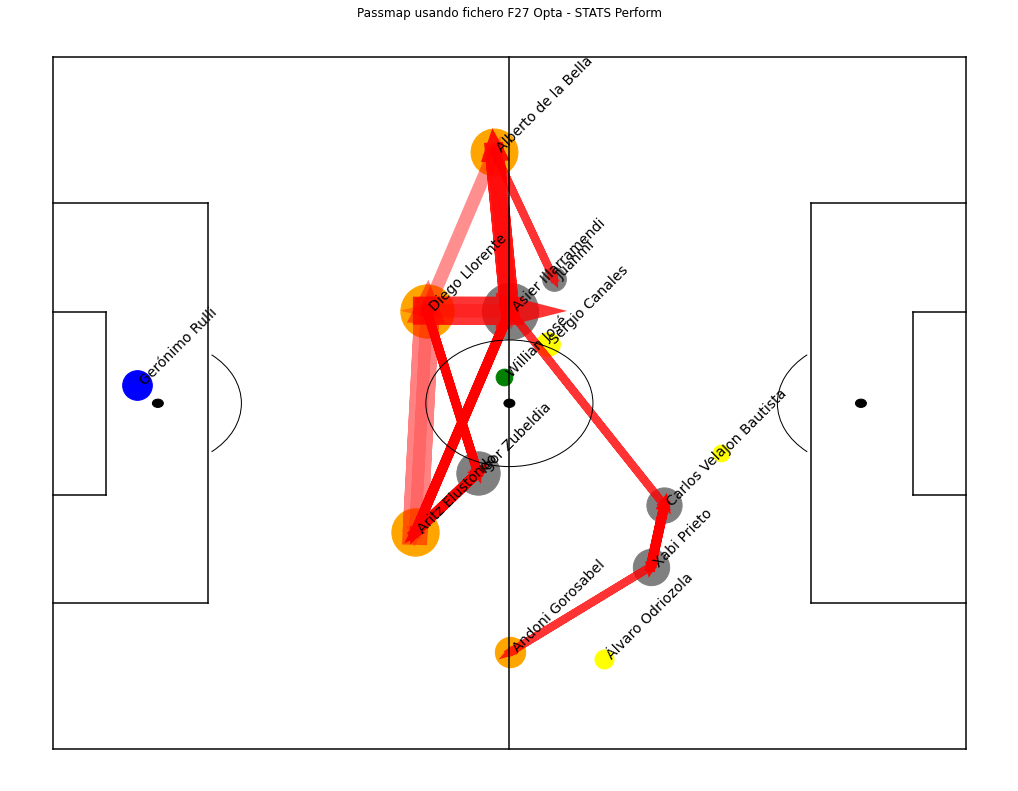

In [38]:
fig, ax = plt.subplots(figsize=(18,14))

# Flechas con los pases entre los jugadores con Plotter(passer, receiver, number)
for i in range(len(df)):
    Plotter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2])

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = 45, size = 14)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Passmap usando fichero F27 Opta - STATS Perform")

plt.show()

## Grafico Posición media basada en contactos con el balón

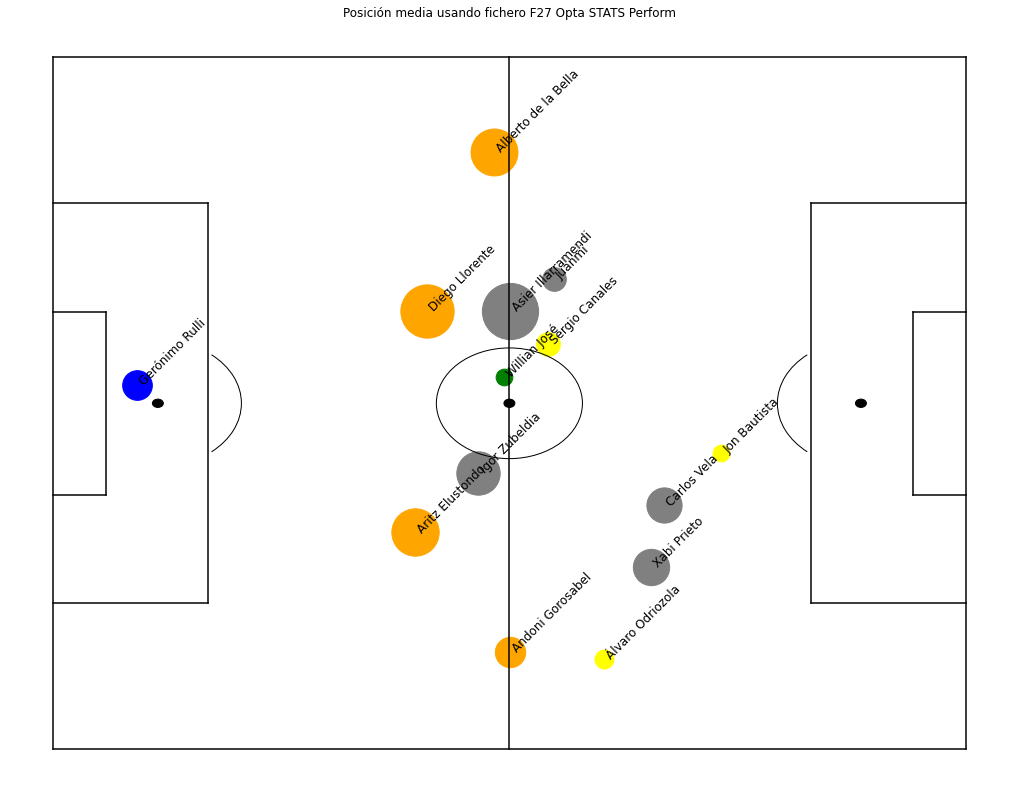

In [46]:
fig, ax = plt.subplots(figsize=(18,14))

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = 45, size = 12)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
#centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreCircle = plt.Circle((50,50),8,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,
               theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Posición media usando fichero F27 Opta STATS Perform")

plt.show()